In [5]:
import pandas as pd
import os
import numpy as np
import datetime

from collections import defaultdict
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from pymongo import MongoClient

In [6]:
rootPath = '/home/sid/Downloads/September/September'
df = pd.DataFrame(index=range(1,31),columns=['date'])
frame = pd.DataFrame()
clusters = []
try:
    i = 1
    for path in os.listdir(rootPath):
        image_paths = [os.path.join(rootPath+'/'+path, f) for f in os.listdir(rootPath+'/'+path)] 
#         print(path)
        df3 = pd.DataFrame()
        df2 = pd.DataFrame()
        list_ = []
        #taking data between 18 to 22(both inclusive)
        #files start from 245, so 245 = 1st day on september
        if int(path)-244 <= 18 or int(path)-244 >23:
            continue
        print(int(path)-244)
        for csvPath in image_paths:
            df3 = pd.read_csv(csvPath,index_col=None, header=0)
            df3.columns = [os.path.split(csvPath)[1].split(".")[0]]
            
#             print(df3)
            df2[os.path.split(csvPath)[1].split(".")[0]] = df3[:24]
#             if int(path)-244 ==14:
#                 print(df2)
#             print(df2)
#         df = pd.concat([df , df2])
        list_.append(df2)
#         print(list_)
    
        if i == 1:
            frame = df2
        else:
            frame = pd.concat([frame , df2])
        i = i+1
except Exception as e:
    print(e)
    
# print(frame)


19
20
21
23
22


0.246490005924
0.200207081995
0.162914569861
0.189413275398
0.146780864918
0.149480839324
0.15684760425
0.198034085997
0.209382079054


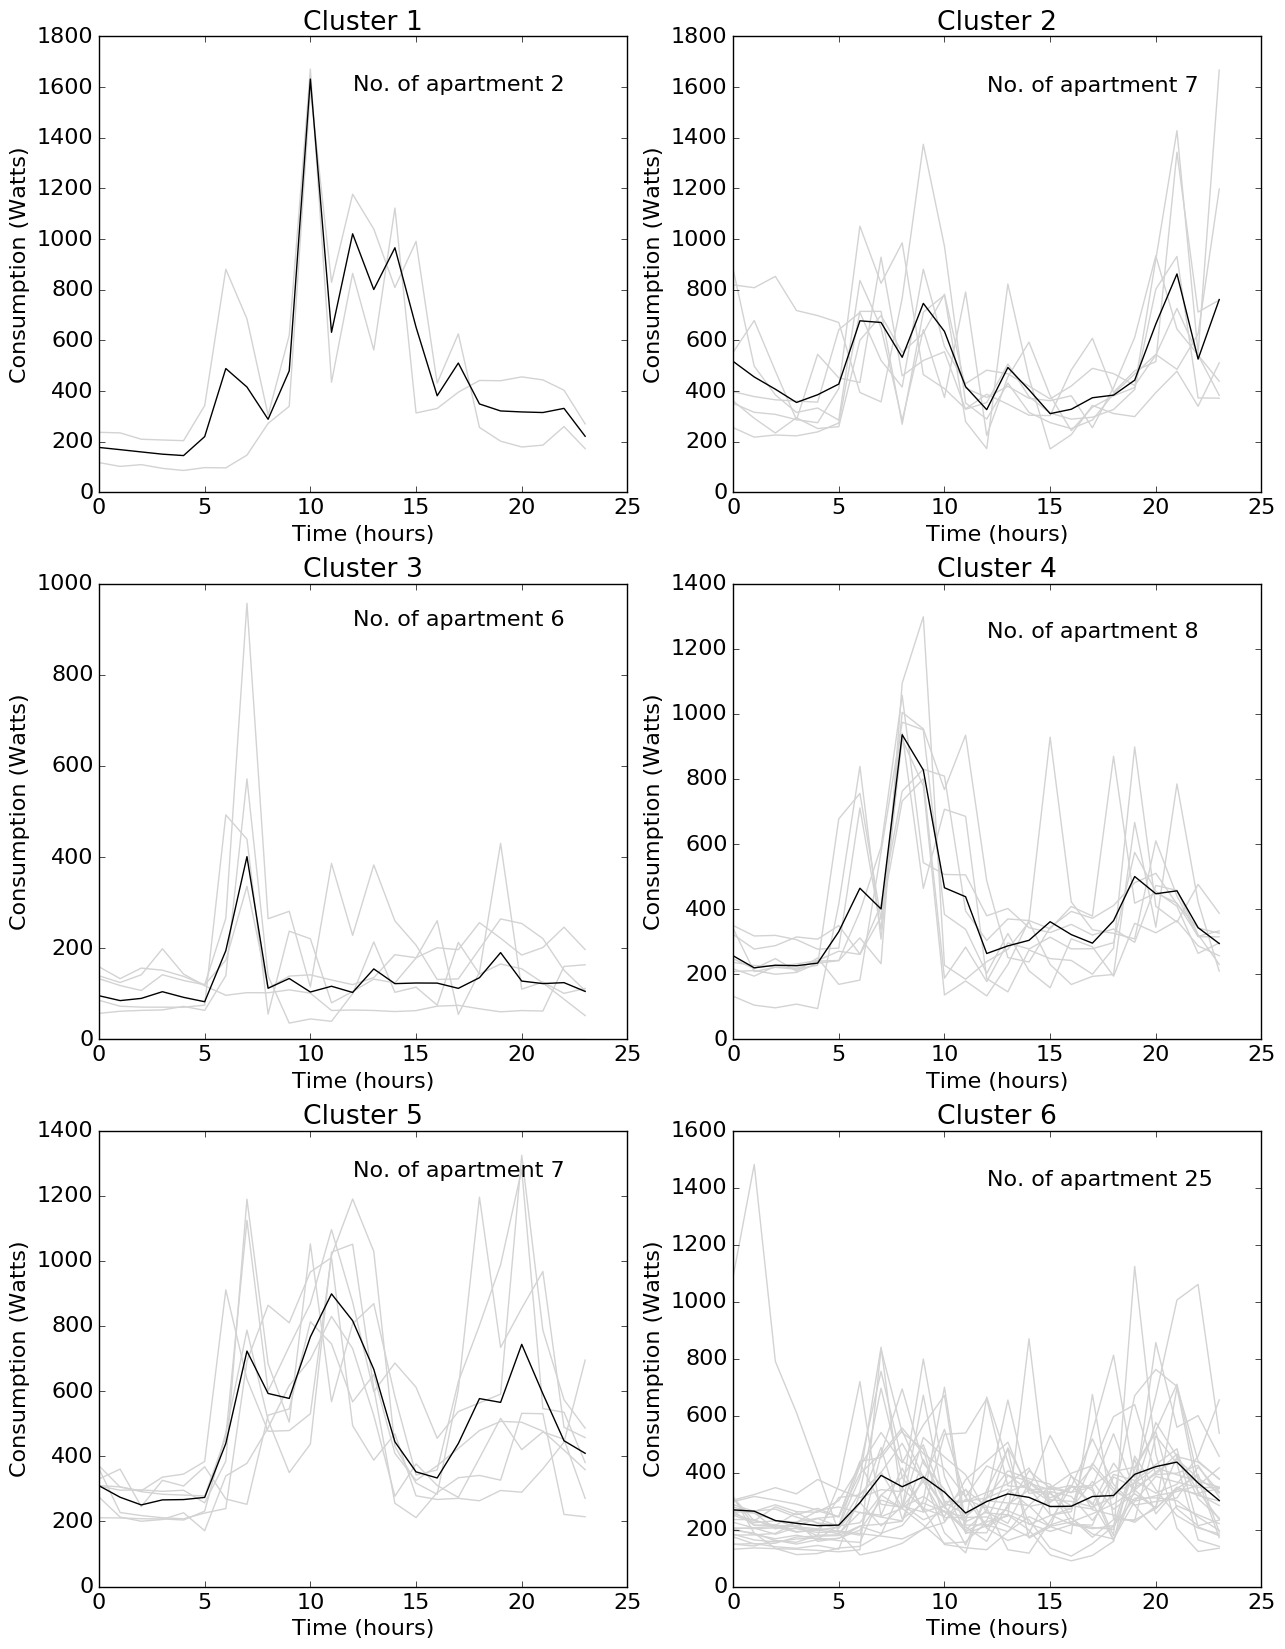

In [8]:
del frame['10']
del frame['11']
del frame['209']
del frame['3']
frame.to_csv('test.csv')

# df = pd.read_csv("/home/sid/Downloads/September/September/245/1.csv")
avList = np.zeros((24, 55))
for j in range(0 , 24):
#     print(frame.loc[frame.index == i].mean(axis=0))
#     print()
    myarray = np.asarray((frame.loc[frame.index == j].mean(axis=0)))
    avList[j] = myarray
# print(avList)

X = avList.T
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    print(metrics.silhouette_score(X, kmeans.labels_, metric='euclidean'))

kmeans = KMeans(n_clusters=6, random_state=0).fit(avList.T)
kmeans.labels_
labelFlatDF = pd.DataFrame()
labelFlatDF['labels'] = kmeans.labels_
# labelFlatDF['flats']  = frame
del frame['1']
l = list(frame)
labelFlatDF['flats']  = l
labelFlatDF.to_csv("clusterDetails.csv")
kmeans.cluster_centers_[0]
fig = plt.figure()

matplotlib.rcParams.update({'font.size': 16})
fig.set_figheight(20)
fig.set_figwidth(15)
# print(labelFlatDF)
for k in range(0,6):
    maxv = 0
    fig.add_subplot(3,2, k+1 )
    for index, row in labelFlatDF.loc[labelFlatDF['labels'] == k].iterrows():
        plt.plot(avList.T[index] , c='lightgrey')
        if maxv < max(avList.T[index]):
            maxv = max(avList.T[index])
#         if k == 2:
#             print(avList.T[index])
    plt.plot(kmeans.cluster_centers_[k] , c='black')
    lzc = len(labelFlatDF.loc[labelFlatDF['labels'] == k])
#     print(kmeans.cluster_centers_[k])
    plt.text(12 , maxv*.95,'No. of apartment '+str(lzc))
    plt.ylabel('Consumption (Watts)')
    plt.xlabel('Time (hours)')
    plt.title('Cluster '+str(k+1))
#     if k == 2:
#         print(kmeans.cluster_centers_[k])
fig.savefig('weekdayprofile.png')